# Load the dataset

In [208]:
import pandas as pd
import numpy as np

df = pd.read_csv('churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Shape of the dataset

In [209]:
df.shape

(7043, 21)

# Non-Null count and data type 

In [210]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

# Duplicate rows

In [211]:
print(df.duplicated().sum())

0


# Convert "TotalCharges" to numeric

In [212]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [213]:
print(df['TotalCharges'].isnull().sum())

11


# Fill the missing values with 0 in "TotalCharge" column

In [214]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [215]:
print(df['TotalCharges'].isnull().sum())

0


# Remove the cuctomerID column

In [216]:
df = df.drop("customerID", axis=1)

In [217]:
df.shape

(7043, 20)

# Count unique categories in each categorical column

In [218]:
cat_cols = df.select_dtypes(include=["str"]).columns
for col in cat_cols:
    print(f"{col} : {df[col].nunique()}")

gender : 2
Partner : 2
Dependents : 2
PhoneService : 2
MultipleLines : 3
InternetService : 3
OnlineSecurity : 3
OnlineBackup : 3
DeviceProtection : 3
TechSupport : 3
StreamingTV : 3
StreamingMovies : 3
Contract : 3
PaperlessBilling : 2
PaymentMethod : 4
Churn : 2


# Manual Binary Encoding for Gender

In [219]:
df["gender"] = df["gender"].map({"Female": 1, "Male": 0})

# Manual Binary Encoding for "Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"

In [220]:
yes_no_columns = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]

for col in yes_no_columns:
    df[col] = df[col].map({"Yes": 1, "No": 0})

# One Hot Encoding for InternetService, Contract, PaymentMethod

In [221]:
df = pd.get_dummies(df, columns=["InternetService", "Contract", "PaymentMethod", "MultipleLines"], drop_first=True)

# One Hot Encoding for all the "Service" columns

In [222]:
service_columns = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

df = pd.get_dummies(df, columns=service_columns, drop_first=True)

# Encoded full dataset

In [223]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,1,0,1,0,1,0,1,29.85,29.85,0,...,False,True,False,False,False,False,False,False,False,False
1,0,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,True,False,False,False,False,False,False
2,0,0,0,0,2,1,1,53.85,108.15,1,...,False,True,False,False,False,False,False,False,False,False
3,0,0,0,0,45,0,0,42.30,1840.75,0,...,False,False,False,True,False,True,False,False,False,False
4,1,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,False,False


# Split the Data

In [224]:
from sklearn.model_selection import train_test_split

X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling from MinMaxScaler

In [225]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

# Logistic Regression Model

In [226]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

print("classification report")
print(classification_report(y_test, y_pred))

Accuracy: 0.7991

classification report
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



# Random Forest Classifier Model

In [227]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(X_train, y_train)

y_pred = forest_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

print("classification report")
print(classification_report(y_test, y_pred))

Accuracy: 0.7878

classification report
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.63      0.50      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



# Gradient Boosting Classifier Model

In [228]:
from sklearn.ensemble import GradientBoostingClassifier

gradiend_model = GradientBoostingClassifier(random_state=42)
gradiend_model.fit(X_train, y_train)

y_pred = gradiend_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

print("classification report")
print(classification_report(y_test, y_pred))

Accuracy: 0.7984

classification report
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.51      0.57       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



# Hyper Parameter Tuning for Logistic Regression Model

In [229]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'], 
    'class_weight': [None, 'balanced'] 
}

grid_search = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000, random_state=42),
    param_grid=param_grid,
    cv=5,             
    scoring='recall'
)

grid_search.fit(X_train, y_train)

print("Best Settings Found: ", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

print("\nTuned Logistic Regression Report")
print(classification_report(y_test, y_pred_best))

Best Settings Found:  {'C': 0.001, 'class_weight': 'balanced', 'solver': 'lbfgs'}
Accuracy: 0.7984


Tuned Logistic Regression Report
              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1035
           1       0.48      0.79      0.59       374

    accuracy                           0.71      1409
   macro avg       0.69      0.74      0.69      1409
weighted avg       0.79      0.71      0.73      1409



# Feature Importance

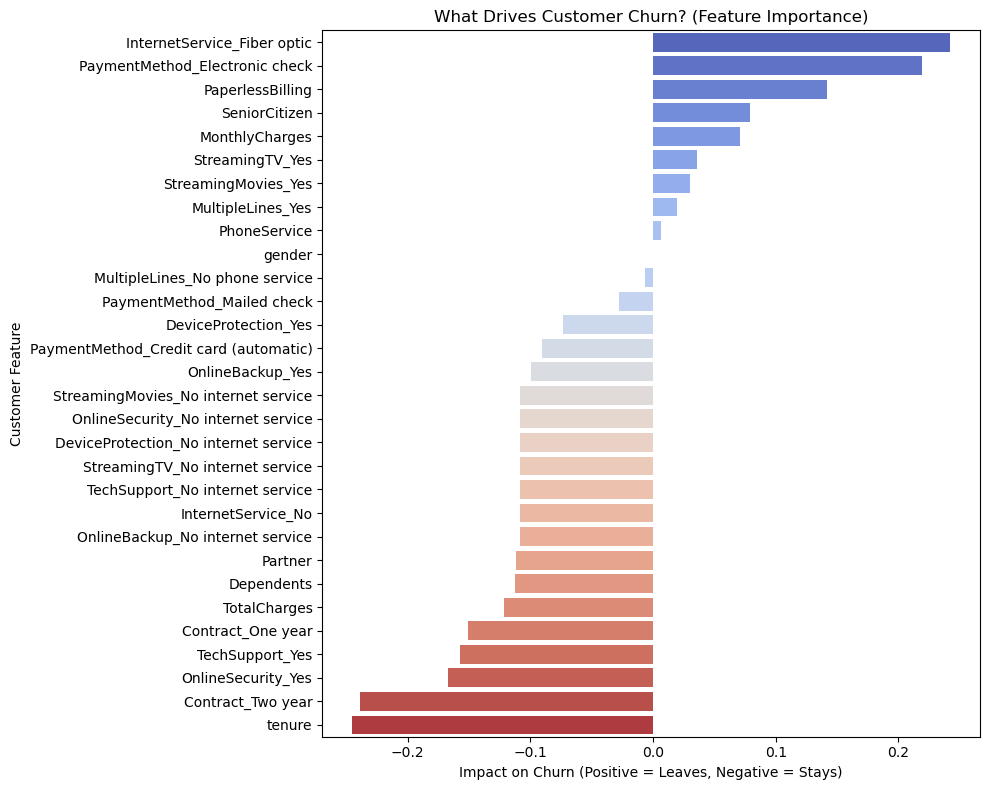

Top 3 reasons customers LEAVE:
                           Feature  Importance
9      InternetService_Fiber optic    0.242138
14  PaymentMethod_Electronic check    0.219396
6                 PaperlessBilling    0.141775

Top 3 reasons customers STAY:
               Feature  Importance
19  OnlineSecurity_Yes   -0.167473
12   Contract_Two year   -0.238891
4               tenure   -0.245457


In [230]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_model.coef_[0]
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='coolwarm')
plt.title('What Drives Customer Churn? (Feature Importance)')
plt.xlabel('Impact on Churn (Positive = Leaves, Negative = Stays)')
plt.ylabel('Customer Feature')
plt.tight_layout()
plt.show()

print("Top 3 reasons customers LEAVE:")
print(feature_importance.head(3))

print("\nTop 3 reasons customers STAY:")
print(feature_importance.tail(3))

# Save the model

In [231]:
import joblib

joblib.dump(best_model, 'telco_churn_model.pkl')
joblib.dump(scaler, 'telco_scaler.pkl')

print("Model and Scaler successfully saved!")

Model and Scaler successfully saved!


In [233]:
joblib.dump(best_model, 'telco_churn_model.pkl')

['telco_churn_model.pkl']

In [234]:
joblib.dump(scaler, 'telco_scaler.pkl')

['telco_scaler.pkl']